In [ ]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


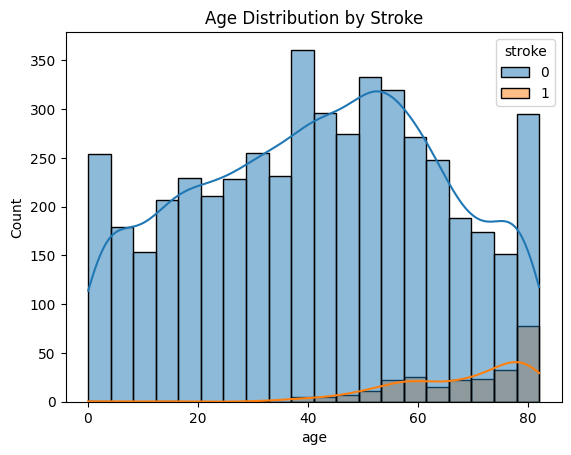

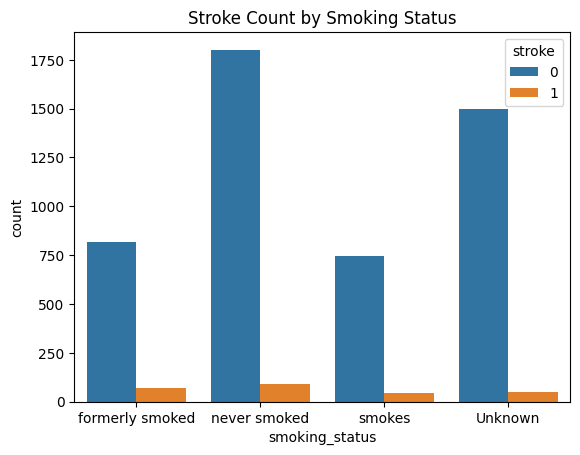

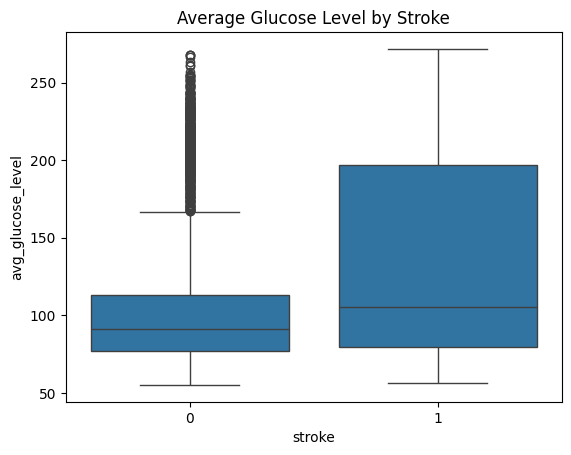

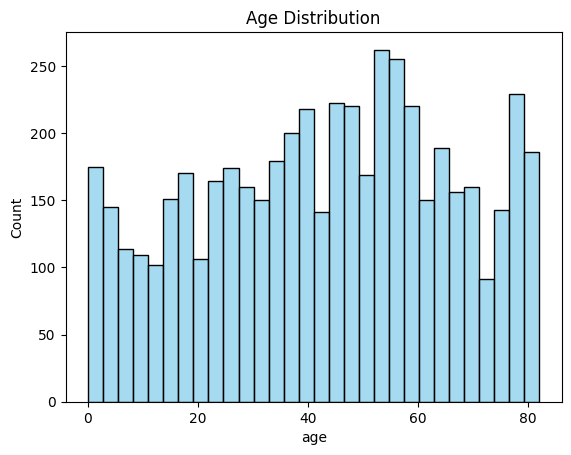

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram with KDE for age distribution, differentiated by stroke status
sns.histplot(data=data, x="age", hue="stroke", kde=True)
plt.title("Age Distribution by Stroke")
plt.show()

# Count plot for the number of strokes based on smoking status
sns.countplot(data=data, x="smoking_status", hue="stroke")
plt.title("Stroke Count by Smoking Status")
plt.show()

# Box plot to show the distribution of average glucose level by stroke status
sns.boxplot(data=data, x="stroke", y="avg_glucose_level")
plt.title("Average Glucose Level by Stroke")
plt.show()

# Simple histogram for age distribution with horizontal orientation
sns.histplot(data['age'], bins=30, color='skyblue', orientation='horizontal')
plt.title('Age Distribution')
plt.show()

# 3. Data preprocessing

In [ ]:
# 3.
from sklearn.model_selection import train_test_split

X = data.drop(["id", "stroke"], axis=1)
y = data["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test

(      gender    age  hypertension  heart_disease ever_married      work_type  \
 3897    Male   4.00             0              0           No       children   
 576     Male  29.00             0              0           No        Private   
 4013    Male  44.00             1              0          Yes        Private   
 4536  Female  68.00             1              0          Yes        Private   
 1180  Female  62.00             0              0          Yes        Private   
 ...      ...    ...           ...            ...          ...            ...   
 4426    Male  43.00             0              0          Yes       Govt_job   
 466   Female  61.00             1              0          Yes        Private   
 3092  Female   1.16             0              0           No       children   
 3772    Male  80.00             0              0          Yes  Self-employed   
 860   Female  46.00             0              0          Yes        Private   
 
      Residence_type  avg_

# 4.train and test

In [ ]:

# Handle missing values
data['bmi'].fillna(data['bmi'].median(), inplace=True)

# Split features and target variable
X = data.drop(columns=['stroke'])  # Features
y = data['stroke']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Define numeric and categorical features
numeric_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Define preprocessing steps for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)


# 5. Fit models

In [ ]:


classifiers = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for name, classifier in classifiers.items():
    classifier.fit(X_train_processed, y_train)



# 6. Perform 5-fold cross-validation and record accuracy

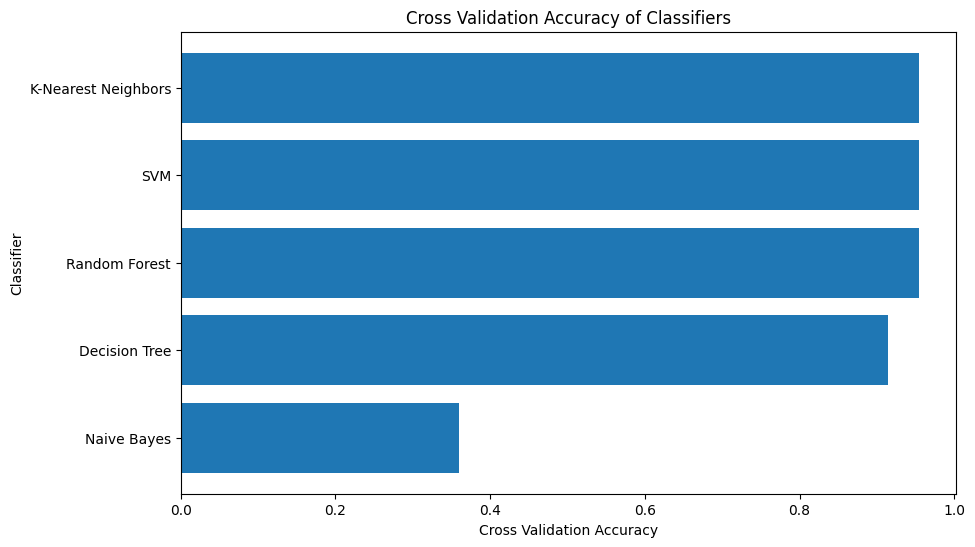

In [ ]:

cv_scores = {}
for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X_train_processed, y_train, cv=5)
    cv_scores[name] = np.mean(scores)

# Plot cross-validation scores
plt.figure(figsize=(10, 6))
plt.barh(list(cv_scores.keys()), list(cv_scores.values()))
plt.xlabel('Cross Validation Accuracy')
plt.ylabel('Classifier')
plt.title('Cross Validation Accuracy of Classifiers')
plt.show()



In [ ]:
# 7. Use test data for prediction
predictions = {}
for name, classifier in classifiers.items():
    predictions[name] = classifier.predict(X_test_processed)


In [ ]:

# 8. Evaluate models using classification report
reports = {}
for name in classifiers.keys():
    report = classification_report(y_test, predictions[name], output_dict=True)
    reports[name] = report

# Plot accuracy, precision, recall, and f1-score
accuracy = {name: report['accuracy'] for name, report in reports.items()}
precision = {name: report['weighted avg']['precision'] for name, report in reports.items()}
recall = {name: report['weighted avg']['recall'] for name, report in reports.items()}
f1_score = {name: report['weighted avg']['f1-score'] for name, report in reports.items()}



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy

{'Naive Bayes': 0.3767123287671233,
 'Decision Tree': 0.9050880626223092,
 'Random Forest': 0.9383561643835616,
 'SVM': 0.9393346379647749,
 'K-Nearest Neighbors': 0.9344422700587084}

In [ ]:
precision

{'Naive Bayes': 0.9447155427518764,
 'Decision Tree': 0.9058001229355522,
 'Random Forest': 0.8822937490775897,
 'SVM': 0.8823495620804148,
 'K-Nearest Neighbors': 0.8820693994654474}

In [ ]:
recall

{'Naive Bayes': 0.3767123287671233,
 'Decision Tree': 0.9050880626223092,
 'Random Forest': 0.9383561643835616,
 'SVM': 0.9393346379647749,
 'K-Nearest Neighbors': 0.9344422700587084}

In [ ]:
f1_score

{'Naive Bayes': 0.4828469716777666,
 'Decision Tree': 0.9054429808414975,
 'Random Forest': 0.9094618049552946,
 'SVM': 0.9099508097337881,
 'K-Nearest Neighbors': 0.9075008389037532}

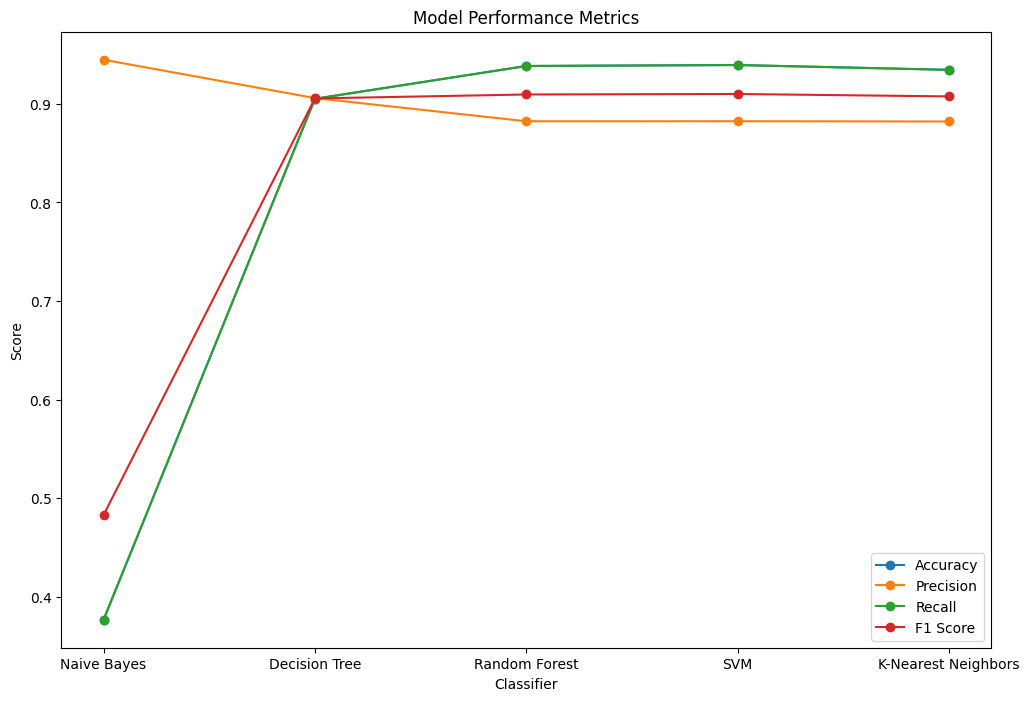

In [ ]:

plt.figure(figsize=(12, 8))
plt.plot(accuracy.keys(), accuracy.values(), label='Accuracy', marker='o')
plt.plot(precision.keys(), precision.values(), label='Precision', marker='o')
plt.plot(recall.keys(), recall.values(), label='Recall', marker='o')
plt.plot(f1_score.keys(), f1_score.values(), label='F1 Score', marker='o')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.legend()
plt.show()